### Importing Libraries

In [48]:
import numpy as np
import pandas as pd

from datetime import date
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objs as go



### Loading Data

In [50]:
df=pd.read_csv('algiers_open-meteo.csv')
df.describe()

,temperature_2m_mean (°C),precipitation_sum (mm),wind_speed_10m_max (km/h),wind_direction_10m_dominant (°),et0_fao_evapotranspiration (mm)
count,1096.000000,1096.000000,1096.000000,1096.000000,1096.000000
mean,18.335766,1.355474,19.126186,162.761861,3.481432
std,5.838799,3.872355,6.530542,117.926069,1.558640
min,5.500000,0.000000,7.200000,1.000000,0.570000
25%,13.300000,0.000000,14.500000,47.000000,2.140000
50%,18.050000,0.000000,18.000000,177.000000,3.425000
75%,23.400000,0.600000,22.525000,269.000000,4.750000
max,37.700000,41.700000,54.600000,360.000000,9.090000


In [51]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1096 entries, 0 to 1095
Data columns (total 6 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   time                             1096 non-null   object 
 1   temperature_2m_mean (°C)         1096 non-null   float64
 2   precipitation_sum (mm)           1096 non-null   float64
 3   wind_speed_10m_max (km/h)        1096 non-null   float64
 4   wind_direction_10m_dominant (°)  1096 non-null   int64  
 5   et0_fao_evapotranspiration (mm)  1096 non-null   float64
dtypes: float64(4), int64(1), object(1)
memory usage: 51.5+ KB


In [52]:
df.head()

,time,temperature_2m_mean (°C),precipitation_sum (mm),wind_speed_10m_max (km/h),wind_direction_10m_dominant (°),et0_fao_evapotranspiration (mm)
0,2020-11-19,13.9,0.0,10.0,319,1.78
1,2020-11-20,13.5,8.0,18.7,54,0.81
2,2020-11-21,14.7,1.3,22.1,15,2.79
3,2020-11-22,14.3,1.2,18.1,26,1.94
4,2020-11-23,12.9,0.0,10.8,264,1.68


In [53]:
df.shape

(1096, 6)

### Checking the distribution of target variables

In [54]:
df['precipitation_sum (mm)'].value_counts()

0.0     705
0.1      38
0.4      23
0.2      21
0.3      19
       ... 
6.3       1
6.2       1
11.2      1
9.5       1
29.6      1
Name: precipitation_sum (mm), Length: 115, dtype: int64

### Grouping the data on the basis of percipitation sum

In [55]:
data_mean=df.groupby('precipitation_sum (mm)').mean()
data_mean

,temperature_2m_mean (°C),wind_speed_10m_max (km/h),wind_direction_10m_dominant (°),et0_fao_evapotranspiration (mm)
precipitation_sum (mm),,,,
0.0,19.810213,17.645816,148.499291,4.016908
0.1,19.550000,22.823684,183.842105,3.575000
0.2,16.057143,17.976190,143.904762,2.754762
0.3,18.457895,19.410526,139.105263,3.216842
0.4,17.156522,21.491304,166.652174,3.123043
...,...,...,...,...
28.3,13.900000,23.500000,251.000000,2.440000
29.6,17.300000,32.400000,254.000000,1.180000
31.6,11.200000,27.300000,227.000000,1.180000


### To retieve data easily and plotting graphs convert the date column as index

In [56]:
df1=df.copy()
df['time']=pd.to_datetime(df1['time'])
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1096 entries, 0 to 1095
Data columns (total 6 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   time                             1096 non-null   object 
 1   temperature_2m_mean (°C)         1096 non-null   float64
 2   precipitation_sum (mm)           1096 non-null   float64
 3   wind_speed_10m_max (km/h)        1096 non-null   float64
 4   wind_direction_10m_dominant (°)  1096 non-null   int64  
 5   et0_fao_evapotranspiration (mm)  1096 non-null   float64
dtypes: float64(4), int64(1), object(1)
memory usage: 51.5+ KB


In [57]:
df1.head()

,time,temperature_2m_mean (°C),precipitation_sum (mm),wind_speed_10m_max (km/h),wind_direction_10m_dominant (°),et0_fao_evapotranspiration (mm)
0,2020-11-19,13.9,0.0,10.0,319,1.78
1,2020-11-20,13.5,8.0,18.7,54,0.81
2,2020-11-21,14.7,1.3,22.1,15,2.79
3,2020-11-22,14.3,1.2,18.1,26,1.94
4,2020-11-23,12.9,0.0,10.8,264,1.68


In [58]:
df1=df.set_index('time')
df1.index

DatetimeIndex(['2020-11-19', '2020-11-20', '2020-11-21', '2020-11-22',
               '2020-11-23', '2020-11-24', '2020-11-25', '2020-11-26',
               '2020-11-27', '2020-11-28',
               ...
               '2023-11-10', '2023-11-11', '2023-11-12', '2023-11-13',
               '2023-11-14', '2023-11-15', '2023-11-16', '2023-11-17',
               '2023-11-18', '2023-11-19'],
              dtype='datetime64[ns]', name='time', length=1096, freq=None)

In [59]:
df1.head()

,temperature_2m_mean (°C),precipitation_sum (mm),wind_speed_10m_max (km/h),wind_direction_10m_dominant (°),et0_fao_evapotranspiration (mm)
time,,,,,
2020-11-19,13.9,0.0,10.0,319,1.78
2020-11-20,13.5,8.0,18.7,54,0.81
2020-11-21,14.7,1.3,22.1,15,2.79
2020-11-22,14.3,1.2,18.1,26,1.94
2020-11-23,12.9,0.0,10.8,264,1.68


In [60]:
df1.tail()

,temperature_2m_mean (°C),precipitation_sum (mm),wind_speed_10m_max (km/h),wind_direction_10m_dominant (°),et0_fao_evapotranspiration (mm)
time,,,,,
2023-11-15,17.5,0.0,10.2,293,2.20
2023-11-16,16.8,0.0,12.7,267,2.27
2023-11-17,16.5,0.0,10.5,281,2.17
2023-11-18,16.3,0.0,14.8,56,1.84
2023-11-19,16.5,0.0,8.7,327,2.20


### Plotting Graphs 

In [68]:
graph1=px.bar(df1,x="temperature_2m_mean (°C)",y="precipitation_sum (mm)",title="percipitation trend")
                        
graph1.update_layout(font_color="white", bargap=0.2,yaxis_title="Amount of precipitation (mm)",xaxis_title="Days" , paper_bgcolor="rgba(0,0,0,0)", plot_bgcolor="rgba(0,0,0,0)" )
graph1.show()

array([[<AxesSubplot:xlabel='time'>, <AxesSubplot:xlabel='time'>,
        <AxesSubplot:xlabel='time'>],
       [<AxesSubplot:xlabel='time'>, <AxesSubplot:xlabel='time'>,
        <AxesSubplot:xlabel='time'>]], dtype=object)

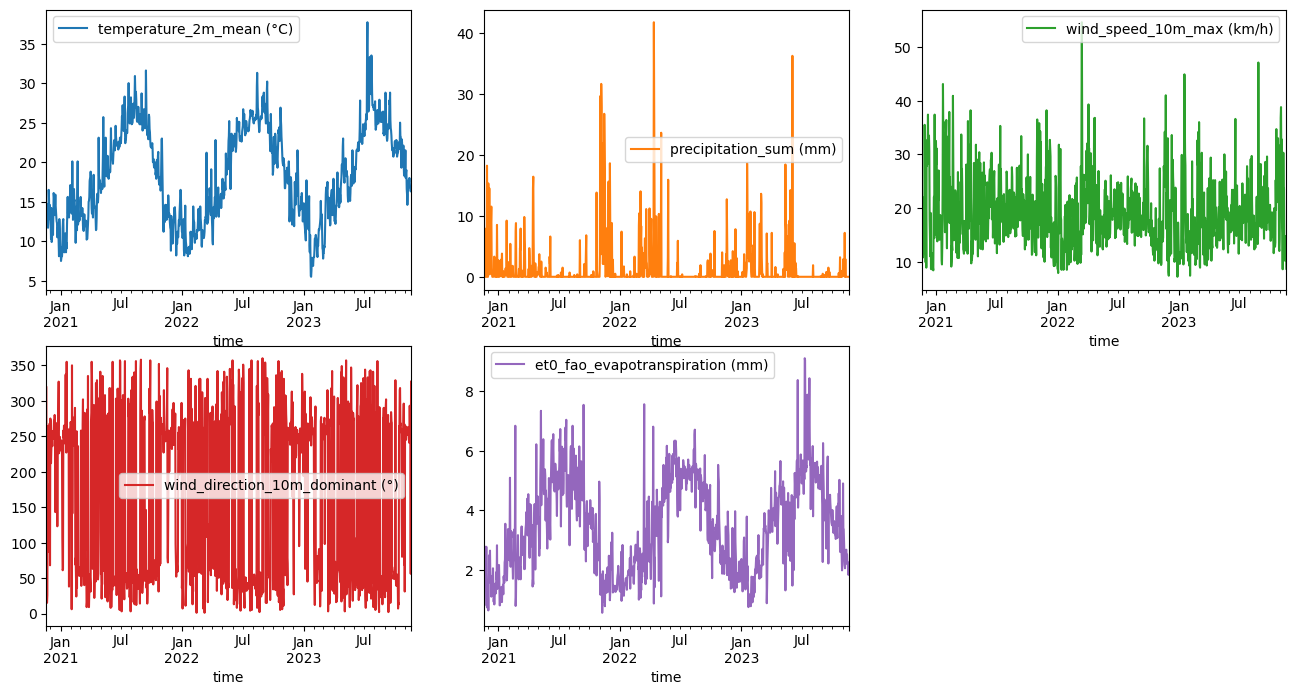

In [69]:
df1.plot(subplots=True,sharex=False,layout=(2,3),figsize=(16,8))

### Percipitation Trend

In [70]:
# Line Graph
graph2 = px.line(df1,x= df1.index, y="precipitation_sum (mm)",title='Percipitation Trend')
graph2.update_layout(font_color="white", bargap=0.2,yaxis_title="Amount of percipitation (mm)",xaxis_title="Time" , paper_bgcolor="rgba(0,0,0,0)", plot_bgcolor="rgba(0,0,0,0)" )
graph2.show()